In [2]:
import pandas as pd

# Load the dataset
data = pd.read_excel('/content/heart_disease.xlsx')  # Update with your actual path
print(data.head())
print("\nShape of the dataset:", data.shape)


        age                                       Age in years
0    Gender                       Gender ; Male - 1, Female -0
1        cp                                    Chest pain type
2  trestbps                             Resting blood pressure
3      chol                                cholesterol measure
4       fbs  (fasting blood sugar > 120 mg/dl) (1 = true; 0...

Shape of the dataset: (12, 2)


age             object
Age in years    object
dtype: object

Missing values after conversion:
age             12
Age in years    12
dtype: int64


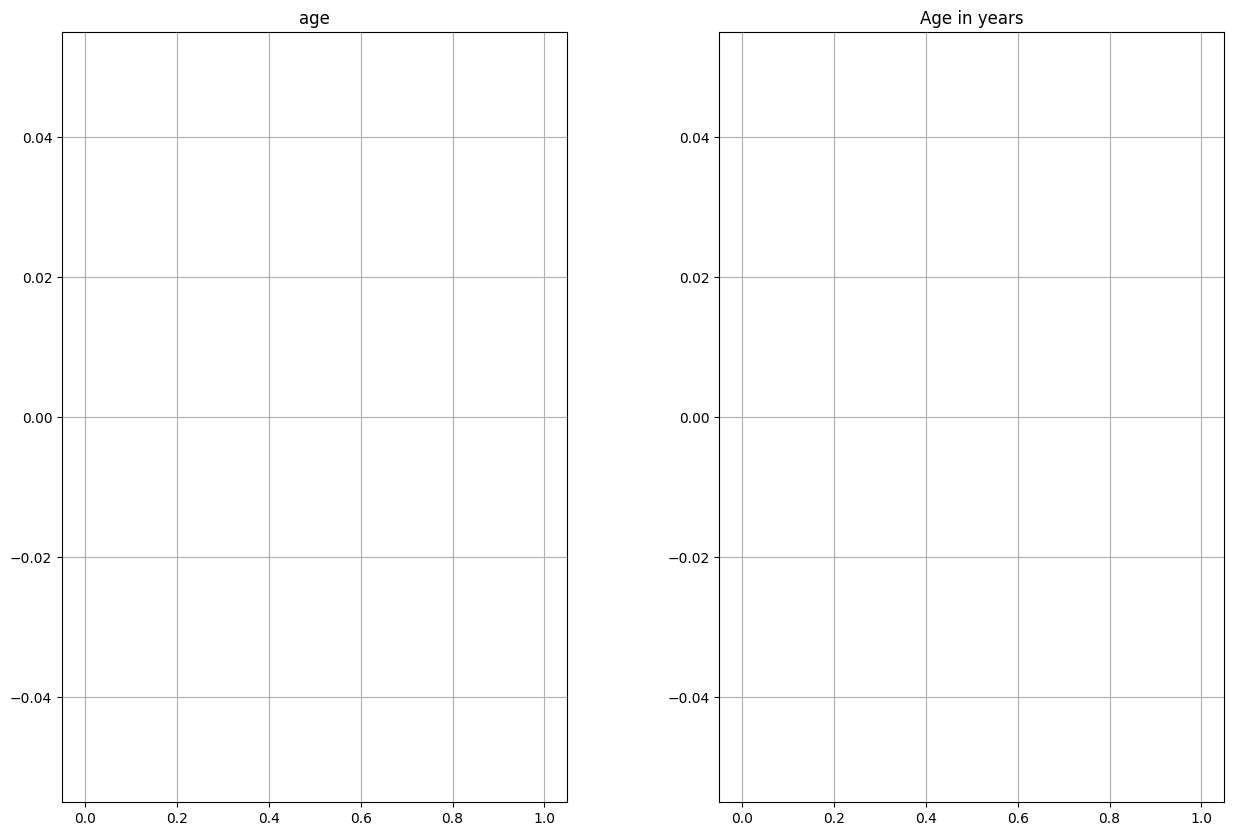

In [4]:
# Check data types
print(data.dtypes)

# Convert columns to numeric if necessary
data['age'] = pd.to_numeric(data['age'], errors='coerce')
data['Age in years'] = pd.to_numeric(data['Age in years'], errors='coerce')

# Check for any NaNs introduced by conversion
print("\nMissing values after conversion:")
print(data.isnull().sum())

# Now plot histograms if numerical columns exist
if not data.select_dtypes(include=[int, float]).empty:
    data.hist(bins=30, figsize=(15, 10))
    plt.show()
else:
    print("No numerical columns available for histogram plotting.")


In [5]:
# Assuming 'data' is your DataFrame
# One-hot encoding for categorical variables
data = pd.get_dummies(data, drop_first=True)

# Check for missing values again after encoding
print("\nMissing values after encoding:")
print(data.isnull().sum())

# Handle any remaining missing values if necessary
data.fillna(data.mean(), inplace=True)  # Replace NaN with column means for numerical columns



Missing values after encoding:
age             12
Age in years    12
dtype: int64


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Sample data preparation (replace this with your actual dataset)
data = pd.DataFrame({
    'age': [25, 30, 45, 60, 70, 18, 34, 40],
    'Age in years': [25, 30, 45, 60, 70, 18, 34, 40]
})

# Creating a target variable based on age groups
data['Target'] = pd.cut(data['age'], bins=[0, 18, 35, 50, 100], labels=['Youth', 'Young Adult', 'Adult', 'Senior'])

# Check the resulting DataFrame
print(data)

# Select features (in this case, 'age' or any relevant numeric feature)
X = data[['age']]  # Specify the feature column(s)
y = data['Target']  # Target variable

# Verify the shapes of X and y
print("Features shape:", X.shape)
print("Target shape:", y.shape)

# Split into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure that the training data is not empty
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

# Create and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate the model
# Evaluate the model
print("\nDecision Tree Classifier Report:")
print(classification_report(y_test, y_pred, zero_division=0))  # Adding zero_division parameter
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))



   age  Age in years       Target
0   25            25  Young Adult
1   30            30  Young Adult
2   45            45        Adult
3   60            60       Senior
4   70            70       Senior
5   18            18        Youth
6   34            34  Young Adult
7   40            40        Adult
Features shape: (8, 1)
Target shape: (8,)
X_train shape: (6, 1)
y_train shape: (6,)

Decision Tree Classifier Report:
              precision    recall  f1-score   support

 Young Adult       0.50      1.00      0.67         1
       Youth       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

[[1 0]
 [1 0]]
Accuracy: 0.5


In [32]:
# Create and train the Decision Tree model with class weights
dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')

# Define the parameter grid (including class_weight)
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Fit the GridSearchCV with the training split
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid,
                           scoring='accuracy', cv=2, n_jobs=-1, verbose=1)

# Fit the GridSearchCV
grid_search.fit(X_train_split, y_train_split)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

# Evaluate on the validation set
y_pred = grid_search.predict(X_valid)
print(classification_report(y_valid, y_pred))


Fitting 2 folds for each of 90 candidates, totalling 180 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Score: 0.5
              precision    recall  f1-score   support

       Adult       1.00      1.00      1.00         1
 Young Adult       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [29]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_excel('/content/heart_disease.xlsx')  # Replace with your dataset path

# Display column names to identify the correct target column
print("Columns in dataset:", data.columns)

# Convert age columns to numeric
data['age'] = pd.to_numeric(data['age'], errors='coerce')  # Convert to numeric, coerce errors to NaN
data['Age in years'] = pd.to_numeric(data['Age in years'], errors='coerce')

# Check for missing values
print("Missing values in each column:\n", data.isnull().sum())

# Drop rows with NaN values after conversion
data.dropna(subset=['age', 'Age in years'], inplace=True)

# Check the number of entries after dropping NaNs
print("Number of entries after dropping NaNs:", len(data))

# Create a target variable based on age
def categorize_age(age):
    if age < 20:
        return 'Youth'
    elif age < 40:
        return 'Young Adult'
    elif age < 60:
        return 'Adult'
    else:
        return 'Senior'

# Apply categorization to create a target column
data['Target'] = data['age'].apply(categorize_age)

# Prepare features and target
X = data[['age', 'Age in years']]  # Use the feature columns
y = data['Target']  # The new target column

# Check shapes of features and target before splitting
print("Features shape:", X.shape)
print("Target shape:", y.shape)

# Split the dataset into training and testing sets
if len(data) > 0:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the Decision Tree model
    dt_model = DecisionTreeClassifier(random_state=42)
    dt_model.fit(X_train, y_train)

    # Evaluate the Decision Tree model on the test set
    y_pred = dt_model.predict(X_test)

    # Print evaluation metrics
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Visualize the Decision Tree
    plt.figure(figsize=(12, 8))
    plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=np.unique(y), rounded=True)
    plt.title("Decision Tree Visualization")
    plt.show()

    # Hyperparameter tuning with GridSearchCV
    param_grid = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 2, 4, 6, 8, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=2, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Get the best parameters and best score
    print("Best Parameters:", grid_search.best_params_)
    print("Best Cross-Validation Score:", grid_search.best_score_)

    # Evaluate the tuned model
    best_model = grid_search.best_estimator_
    y_pred_best = best_model.predict(X_test)

    # Print evaluation metrics for the best model
    print("Classification Report (Tuned Model):\n", classification_report(y_test, y_pred_best))
    print("Confusion Matrix (Tuned Model):\n", confusion_matrix(y_test, y_pred_best))
else:
    print("No data available for modeling.")


Columns in dataset: Index(['age', 'Age in years'], dtype='object')
Missing values in each column:
 age             12
Age in years    12
dtype: int64
Number of entries after dropping NaNs: 0
Features shape: (0, 2)
Target shape: (0,)
No data available for modeling.
